In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tj_locations = pd.read_pickle('tj_locations.pkl')
county_covid = pd.read_pickle('alameda_county_covid_july.pkl')

In [9]:
tj_locations.city

3           Oakland
4        Emeryville
6        Pleasanton
10         Berkeley
15          Alameda
16        Livermore
22          Oakland
26    Castro Valley
Name: city, dtype: object

In [23]:
Oakland1 = [3,0,2,0,4,5,5,1,1,1,5,2,2,3,4,0,2,4,4,6,4,3,7,2,2,5,4,5,6,2,3]
Emeryville = [10,8,4,0,9,16,9,9,5,10,13,20,8,8,12,15,5,6,13,12,13,7,8,7,11,11,8,9,9,15,9]
Pleasanton = [0,0,3,0,2,1,1,1,0,0,2,2,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0]
Berkeley = [5,10,5,1,7,4,7,2,6,3,3,5,2,5,3,11,3,6,2,3,4,5,5,5,6,2,4,3,2,8,6]
Alameda = [14,13,29,6,11,15,12,10,12,13,11,21,18,13,11,9,12,15,14,21,13,11,9,26,14,18,11,4,13,18,21]
Livermore = [12,14,12,0,16,6,5,9,8,12,15,13,10,11,6,15,14,9,14,9,11,9,14,17,9,8,9,17,7,8,11]
Oakland2 = [2,11,3,1,9,4,6,1,5,3,5,6,8,4,2,4,2,5,3,6,3,2,4,2,4,5,4,5,2,4,8]
Castro = [38,27,35,2,51,43,34,25,36,41,39,37,39,39,37,30,36,49,41,43,42,35,31,28,33,46,41,37,29,28,32]
days = list(range(1,len(Berkeley)))

In [29]:
tj_july_visits_by_day = pd.DataFrame(list(zip(Oakland1, Emeryville, Pleasanton,Berkeley, Alameda, Livermore, Oakland2, Castro)))

In [32]:
tj_july_visits_by_day['sum'] = tj_july_visits_by_day.sum(axis=1)

In [37]:
cases = county_covid.cases.diff().fillna(0)
deaths = county_covid.deaths.diff().fillna(0)

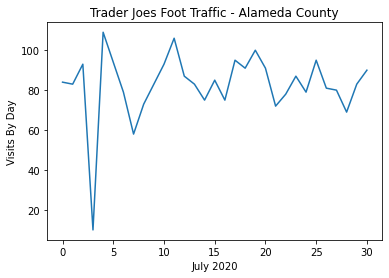

In [57]:
plt.plot(tj_july_visits_by_day['sum'])
plt.plot(tj_july_visits_by_day['sum'].mean())
plt.xlabel('July 2020')
plt.ylabel('Visits By Day')
plt.title('Trader Joes Foot Traffic - Alameda County')
plt.savefig('tj_july')

Text(0.5, 0, 'July 2020')

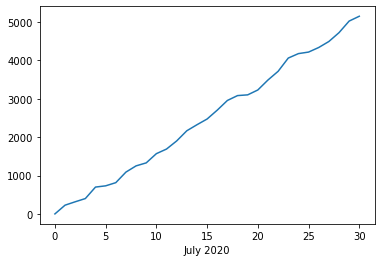

In [49]:
plt.plot(list(range(0,len(cases))),cases.cumsum())
plt.xlabel('July 2020')

Text(0.5, 1.0, 'Cumulative Sum of COVID Deaths - Alameda County')

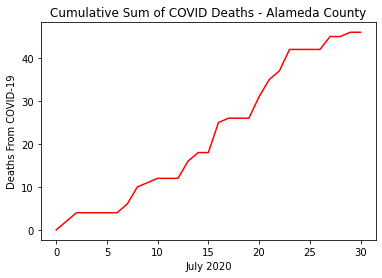

In [60]:
plt.plot(list(range(0,len(deaths))),deaths.cumsum(),'r')
plt.xlabel('July 2020')
plt.ylabel('Deaths From COVID-19')
plt.title('Cumulative Sum of COVID Deaths - Alameda County')

,date,county,state,fips,cases,deaths
290444,2020-07-01,Alameda,California,6001.0,6177,136
293599,2020-07-02,Alameda,California,6001.0,6405,138
296756,2020-07-03,Alameda,California,6001.0,6493,140
299919,2020-07-04,Alameda,California,6001.0,6577,140
303084,2020-07-05,Alameda,California,6001.0,6876,140
306249,2020-07-06,Alameda,California,6001.0,6908,140
309418,2020-07-07,Alameda,California,6001.0,6991,140
312589,2020-07-08,Alameda,California,6001.0,7266,142
315765,2020-07-09,Alameda,California,6001.0,7428,146
318939,2020-07-10,Alameda,California,6001.0,7506,147
